In [3]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


First few rows of the dataset:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99

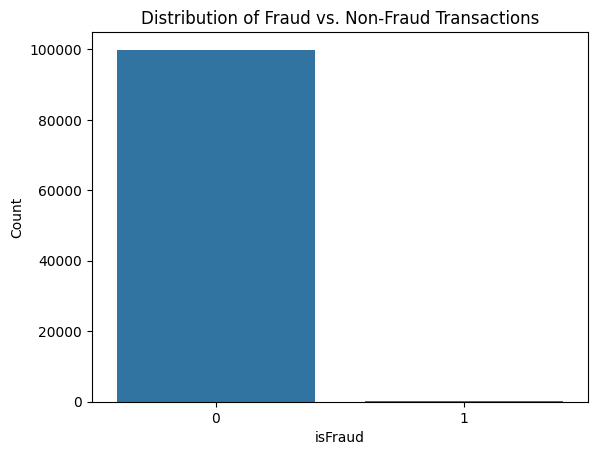

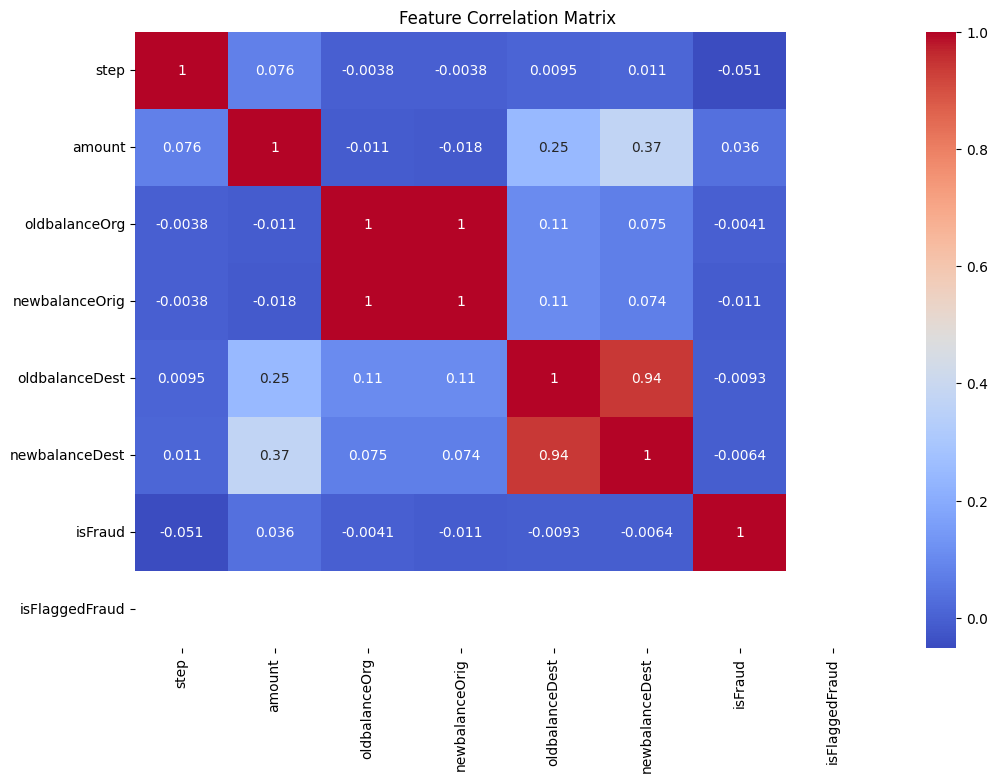


Confusion Matrix:
[[19962    14]
 [    9    15]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19976
           1       0.52      0.62      0.57        24

    accuracy                           1.00     20000
   macro avg       0.76      0.81      0.78     20000
weighted avg       1.00      1.00      1.00     20000


ROC AUC Score: 0.8121495794953945

Tuned Model Confusion Matrix:
[[19961    15]
 [   10    14]]

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19976
           1       0.48      0.58      0.53        24

    accuracy                           1.00     20000
   macro avg       0.74      0.79      0.76     20000
weighted avg       1.00      1.00      1.00     20000


Tuned Model ROC AUC Score: 0.7912912161260179


In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

path = "Synthetic_Financial_datasets_log.csv"
data = pd.read_csv(path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Step 4: Check the dataset information
print("\nDataset Information:")
print(data.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Show basic statistical details
print("\nStatistical Summary of the Dataset:")
print(data.describe())

# Step 5: Basic Data Exploration
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraud vs. Non-Fraud Transactions')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

data_encoded = data.copy() 

numerical_features = data_encoded.select_dtypes(include=['number']).columns
data_encoded_numeric = data_encoded[numerical_features]

plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


# Step 6: Feature Scaling
scaler = StandardScaler()
data['amount'] = scaler.fit_transform(data[['amount']])

encoder = LabelEncoder()

data['type'] = encoder.fit_transform(data['type'])
# Step 7: Train-Test Split
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for column in ['type', 'nameOrig', 'nameDest']:
    encoder = LabelEncoder()
    all_values = pd.concat([X_train[column], X_test[column]]).unique()
    encoder.fit(all_values)
    X_train[column] = encoder.transform(X_train[column])
    X_test[column] = encoder.transform(X_test[column])

# Step 8: Handle Imbalanced Data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 9: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled training set
model.fit(X_train_resampled, y_train_resampled)

# Step 10: Model Evaluation
y_pred = model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred))

# Step 11: Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Step 12: Evaluate the Tuned Model
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model's performance
print("\nTuned Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))

print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))

print("\nTuned Model ROC AUC Score:", roc_auc_score(y_test, y_pred_tuned))


In [1]:
pip install web3

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
from web3 import Web3
# Connect to Ethereum node through ngrok (PoA network)
web3 = Web3(Web3.HTTPProvider("https://7d3a-171-79-55-208.ngrok-free.app"))
print("Is connected:", web3.is_connected())

# Define contract ABI and address (from Remix deployment)
contract_abi = '''[
	{
		"anonymous": false,
		"inputs": [
			{
				"indexed": true,
				"internalType": "address",
				"name": "sender",
				"type": "address"
			},
			{
				"indexed": false,
				"internalType": "string",
				"name": "transactionId",
				"type": "string"
			},
			{
				"indexed": false,
				"internalType": "bool",
				"name": "isFraud",
				"type": "bool"
			}
		],
		"name": "TransactionLogged",
		"type": "event"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "index",
				"type": "uint256"
			}
		],
		"name": "getTransaction",
		"outputs": [
			{
				"internalType": "address",
				"name": "",
				"type": "address"
			},
			{
				"internalType": "string",
				"name": "",
				"type": "string"
			},
			{
				"internalType": "bool",
				"name": "",
				"type": "bool"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "_transactionId",
				"type": "string"
			},
			{
				"internalType": "bool",
				"name": "_isFraud",
				"type": "bool"
			}
		],
		"name": "logTransaction",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"name": "transactions",
		"outputs": [
			{
				"internalType": "address",
				"name": "sender",
				"type": "address"
			},
			{
				"internalType": "string",
				"name": "transactionId",
				"type": "string"
			},
			{
				"internalType": "bool",
				"name": "isFraud",
				"type": "bool"
			}
		],
		"stateMutability": "view",
		"type": "function"
	}
]'''

# Replace with actual ABI from Remix
contract_address = '0x1c626C0E94B705883F362b17f94A7D09fca381ab'

# Get the contract instance
contract = web3.eth.contract(address=contract_address, abi=contract_abi)

# Function to log a transaction on blockchain
def log_transaction(transaction_id, is_fraud):
    txn = contract.functions.logTransaction(transaction_id, is_fraud).build_transaction({
        'from': web3.eth.accounts[0],
        'gas': 2000000,
        'gasPrice': web3.to_wei('50', 'gwei'),
        'nonce': web3.eth.get_transaction_count(web3.eth.accounts[0])
    })
    signed_txn = web3.eth.account.sign_transaction(txn, private_key='0xaf22bbfbf76fd77b10fc92e5abeb7fd070fd45c510991b72b7d97ee38890c0ff')
    txn_hash = web3.eth.send_raw_transaction(signed_txn.raw_transaction)
    print(f"Transaction logged with hash: {web3.to_hex(txn_hash)}")

# Function to retrieve prediction by index
def get_prediction_by_id(prediction_id):
    transaction = contract.functions.getTransaction(prediction_id).call()
    
    # Extract data from the returned tuple
    sender = transaction[0]
    transaction_id = transaction[1]
    is_fraud = transaction[2]

    # Display the retrieved transaction details
    print(f"Prediction ID: {prediction_id}")
    print(f"Sender Address: {sender}")
    print(f"Transaction ID: {transaction_id}")
    print(f"Fraudulent: {is_fraud}")

log_transaction("TXN12345", True)

Is connected: True
Transaction logged with hash: 0x9a99954e686659a1f641f50bed478e90307ddcfc053f8d15a5dac8460ac000f4
Prediction ID: 0
Sender Address: 0x73B53E97Ab5079dff73483F4eD879764DD10cBE5
Transaction ID: TXN12345
Fraudulent: True


In [14]:
get_prediction_by_id(0)  # Use the appropriate index to retrieve the prediction

Prediction ID: 0
Sender Address: 0x73B53E97Ab5079dff73483F4eD879764DD10cBE5
Transaction ID: TXN12345
Fraudulent: True
